# Best Practices

## Docstrings


Numpy Doc
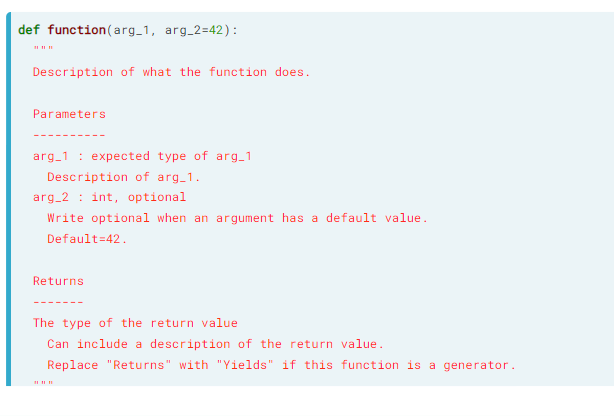

Google format
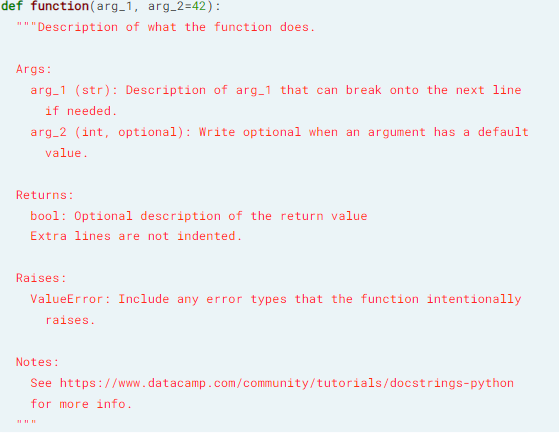

### Crafting a docstring
You've decided to write the world's greatest open-source natural language processing Python package. It will revolutionize working with free-form text, the way numpy did for arrays, pandas did for tabular data, and scikit-learn did for machine learning.

The first function you write is count_letter(). It takes a string and a single letter and returns the number of times the letter appears in the string. You want the users of your open-source package to be able to understand how this function works easily, so you will need to give it a docstring. Build up a Google Style docstring for this function by following these steps.

In [2]:
def count_letter(content, letter):
  """Count the number of times `letter` appears in `content`.

  Args:
    content (str): The string to search.
    letter (str): The letter to search for.

  Returns:
    int

  # Add a section detailing what errors might be raised
  Raises:
    ValueError: If `letter` is not a one-character string.
  """
  if (not isinstance(letter, str)) or len(letter) != 1:
    raise ValueError('`letter` must be a single character string.')
  return len([char for char in content if char == letter])

### Retrieving docstrings
You and a group of friends are working on building an amazing new Python IDE (integrated development environment -- like PyCharm, Spyder, Eclipse, Visual Studio, etc.). The team wants to add a feature that displays a tooltip with a function's docstring whenever the user starts typing the function name. That way, the user doesn't have to go elsewhere to look up the documentation for the function they are trying to use. You've been asked to complete the build_tooltip() function that retrieves a docstring from an arbitrary function.

Note that in Python, you can pass a function as an argument to another function. I'll talk more about this in chapter 3, but it will be useful to keep in mind for this exercise.

In [3]:
# Get the docstring with an attribute of count_letter()
docstring = count_letter.__doc__

border = '#' * 28
print('{}\n{}\n{}'.format(border, docstring, border))

############################
Count the number of times `letter` appears in `content`.

  Args:
    content (str): The string to search.
    letter (str): The letter to search for.

  Returns:
    int

  # Add a section detailing what errors might be raised
  Raises:
    ValueError: If `letter` is not a one-character string.
  
############################


In [4]:
import inspect

# Get the docstring with a function from the inspect module
docstring = inspect.getdoc(count_letter)

border = '#' * 28
print('{}\n{}\n{}'.format(border, docstring, border))

############################
Count the number of times `letter` appears in `content`.

Args:
  content (str): The string to search.
  letter (str): The letter to search for.

Returns:
  int

# Add a section detailing what errors might be raised
Raises:
  ValueError: If `letter` is not a one-character string.
############################


In [5]:
def build_tooltip(function):
  """Create a tooltip for any function that shows the 
  function's docstring.
  
  Args:
    function (callable): The function we want a tooltip for.
    
  Returns:
    str
  """
  # Use 'inspect' to get the docstring
  docstring = inspect.getdoc(function)
  border = '#' * 28
  return '{}\n{}\n{}'.format(border, docstring, border)

print(build_tooltip(count_letter))
print(build_tooltip(range))
print(build_tooltip(print))

############################
Count the number of times `letter` appears in `content`.

Args:
  content (str): The string to search.
  letter (str): The letter to search for.

Returns:
  int

# Add a section detailing what errors might be raised
Raises:
  ValueError: If `letter` is not a one-character string.
############################
############################
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
############################
############################
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword argument

## DRY and "Do One Thing"
- every function should have one thing to do
- function that do more than one thing need refactoring

### Extract a function
While you were developing a model to predict the likelihood of a student graduating from college, you wrote this bit of code to get the z-scores of students' yearly GPAs. Now you're ready to turn it into a production-quality system, so you need to do something about the repetition. Writing a function to calculate the z-scores would improve this code.

# Standardize the GPAs for each year
df['y1_z'] = (df.y1_gpa - df.y1_gpa.mean()) / df.y1_gpa.std()
df['y2_z'] = (df.y2_gpa - df.y2_gpa.mean()) / df.y2_gpa.std()
df['y3_z'] = (df.y3_gpa - df.y3_gpa.mean()) / df.y3_gpa.std()
df['y4_z'] = (df.y4_gpa - df.y4_gpa.mean()) / df.y4_gpa.std()
Note: df is a pandas DataFrame where each row is a student with 4 columns of yearly student GPAs: y1_gpa, y2_gpa, y3_gpa, y4_gpa

In [6]:
def standardize(column):
  """Standardize the values in a column.

  Args:
    column (pandas Series): The data to standardize.

  Returns:
    pandas Series: the values as z-scores
  """
  # Finish the function so that it returns the z-scores
  z_score = (column - column.mean()) / column.std()
  return z_score

# Use the standardize() function to calculate the z-scores
df['y1_z'] = standardize(df['y1_gpa'])
df['y2_z'] =standardize(df['y2_gpa'])
df['y3_z'] = standardize(df['y3_gpa'])
df['y4_z'] = standardize(df['y4_gpa'])

NameError: name 'df' is not defined

### Split up a function
Another engineer on your team has written this function to calculate the mean and median of a list. You want to show them how to split it into two simpler functions: mean() and median()
```python
def mean_and_median(values):
  """Get the mean and median of a list of `values`

  Args:
    values (iterable of float): A list of numbers

  Returns:
    tuple (float, float): The mean and median
  """
  mean = sum(values) / len(values)
  midpoint = int(len(values) / 2)
  if len(values) % 2 == 0:
    median = (values[midpoint - 1] + values[midpoint]) / 2
  else:
    median = values[midpoint]

  return mean, median
```

In [7]:
def mean(values):
  """Get the mean of a list of values

  Args:
    values (iterable of float): A list of numbers

  Returns:
    float
  """
  # Write the mean() function
  mean = sum(values) / len(values)
  return mean

In [8]:
def median(values):
  """Get the median of a list of values

  Args:
    values (iterable of float): A list of numbers

  Returns:
    float
  """
  # Write the median() function
  midpoint = int(len(values) / 2)
  if len(values) % 2 == 0:
    median = (values[midpoint - 1] + values[midpoint]) / 2
  else:
    median = values[midpoint]
  return median

## Pass by assignment
- if we pass list to a funciton it will change original list as list is mutable
- 
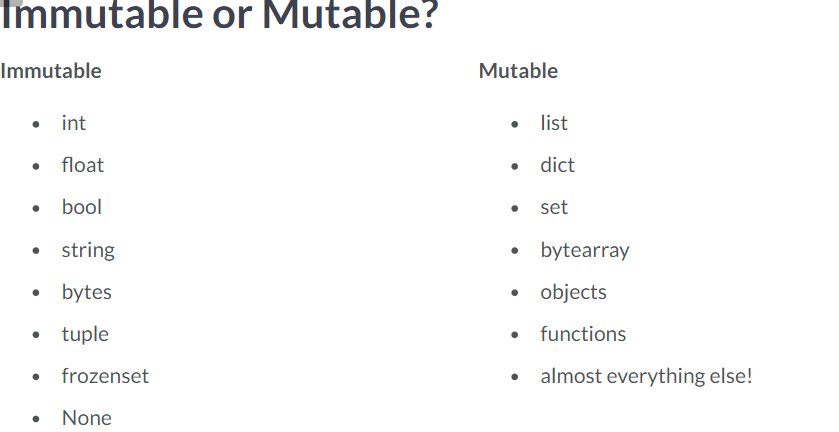

### Best practice for default arguments
One of your co-workers (who obviously didn't take this course) has written this function for adding a column to a panda's DataFrame. Unfortunately, they used a mutable variable as a default argument value! Please show them a better way to do this so that they don't get unexpected behavior.
```python
def add_column(values, df=pandas.DataFrame()):
  """Add a column of `values` to a DataFrame `df`.
  The column will be named "col_<n>" where "n" is
  the numerical index of the column.

  Args:
    values (iterable): The values of the new column
    df (DataFrame, optional): The DataFrame to update.
      If no DataFrame is passed, one is created by default.

  Returns:
    DataFrame
  """
  df['col_{}'.format(len(df.columns))] = values
  return df
```

In [9]:
# Use an immutable variable for the default argument 
def better_add_column(values, df=None):
  """Add a column of `values` to a DataFrame `df`.
  The column will be named "col_<n>" where "n" is
  the numerical index of the column.

  Args:
    values (iterable): The values of the new column
    df (DataFrame, optional): The DataFrame to update.
      If no DataFrame is passed, one is created by default.

  Returns:
    DataFrame
  """
  # Update the function to create a default DataFrame
  if df is None:
    df = pandas.DataFrame()
  df['col_{}'.format(len(df.columns))] = values
  
  return df